___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Відкрийте файл та виведіть описову статистику

In [2]:
data=pd.read_csv(r'C:\Users\VladV\Documents\ОБУЧЕНИЕ\loan_data.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


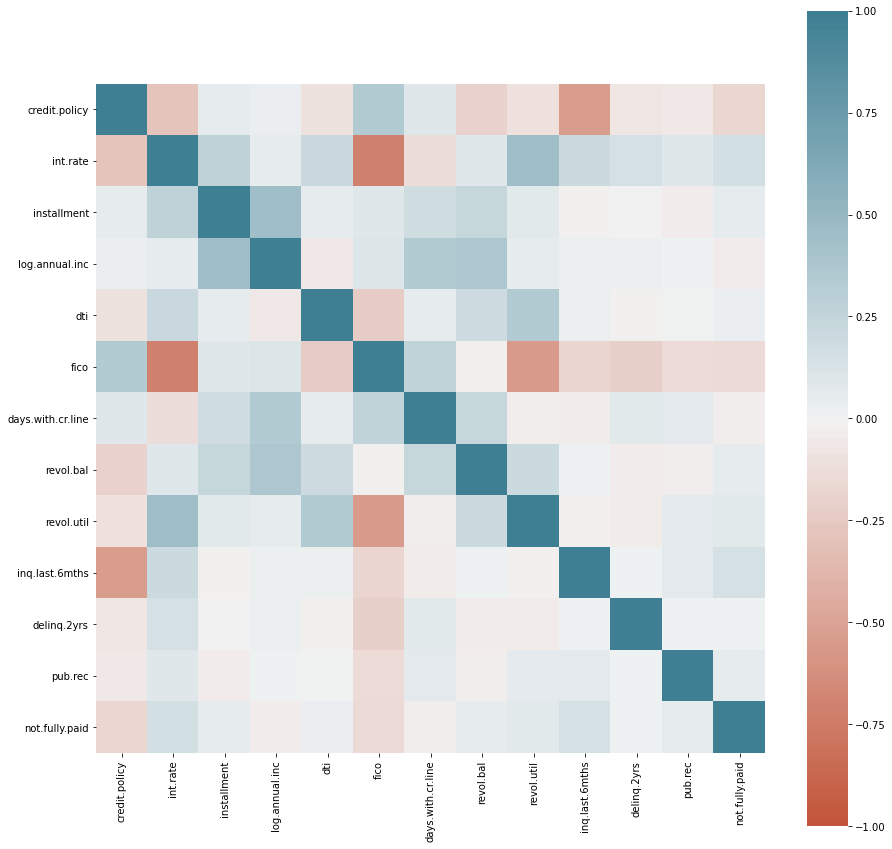

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

<ipython-input-7-296df2233221>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, alpha = 0.5, ax=ax)


array([[<AxesSubplot:xlabel='credit.policy', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='int.rate', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='installment', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='log.annual.inc', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='dti', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='fico', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='days.with.cr.line', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='revol.bal', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='revol.util', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='inq.last.6mths', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='delinq.2yrs', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='pub.rec', ylabel='credit.policy'>,
        <AxesSubplot:xlabel='not.fully.paid', ylabel='credit.policy'>],
       [<AxesSubplot:xlabel='credit.policy', ylabel='int.rate'>,
        <AxesSubplot:xlabel='int.rate', ylabel='int.rate'>

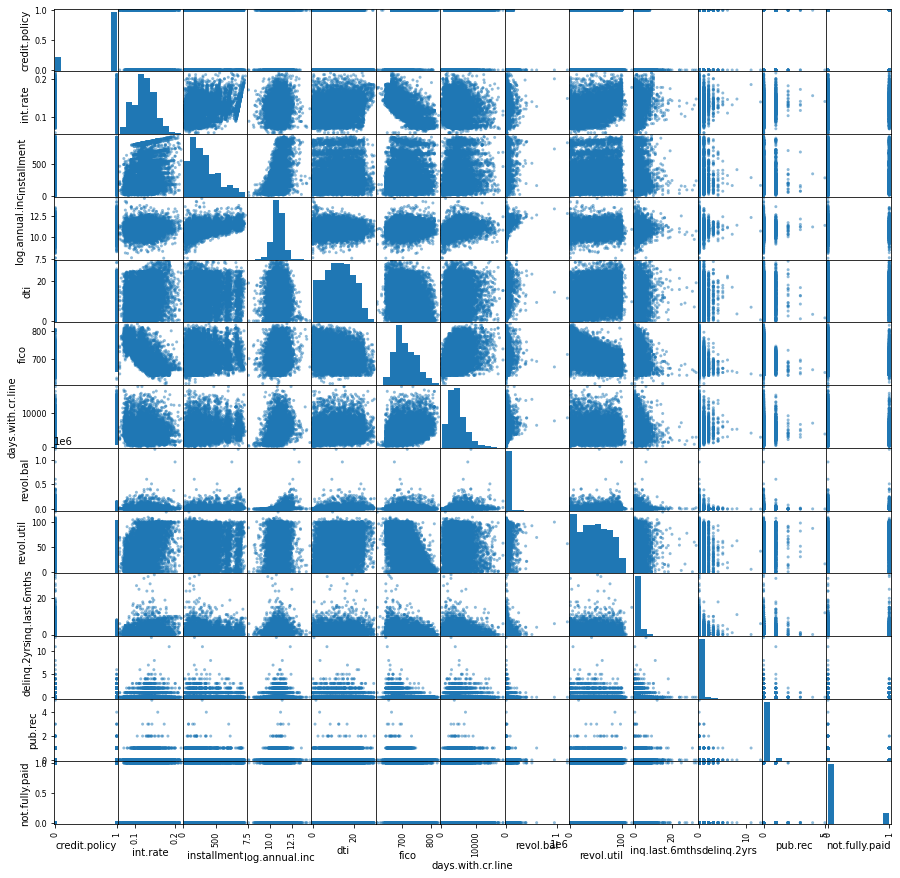

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(data, alpha = 0.5, ax=ax)

### Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

#### Гістограма по полю fico для значень not.fully.paid=0

<AxesSubplot:xlabel='fico', ylabel='Count'>

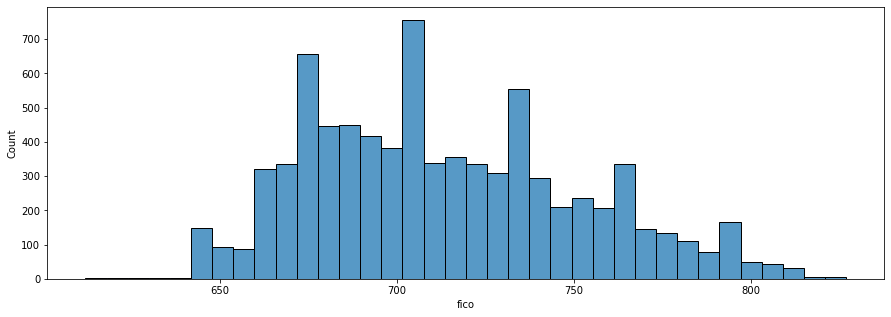

In [8]:
data_0 = data[data['not.fully.paid'] == 0]
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data = data_0, x = 'fico', ax=ax)

#### Гістограма по полю fico для значень not.fully.paid=1

<AxesSubplot:xlabel='fico', ylabel='Count'>

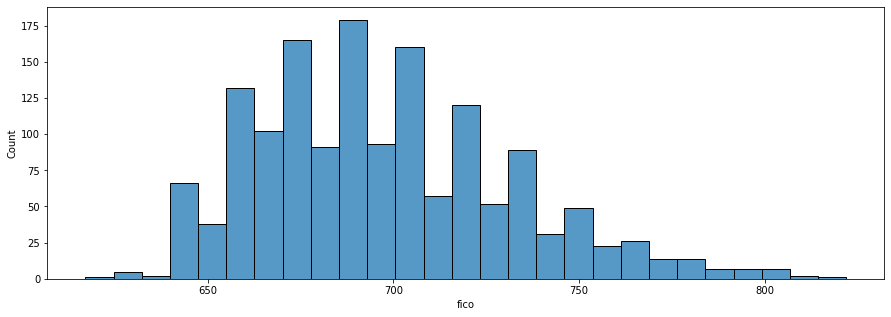

In [9]:
data_1 = data[data['not.fully.paid'] == 1]
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data = data_1, x = 'fico', ax=ax)

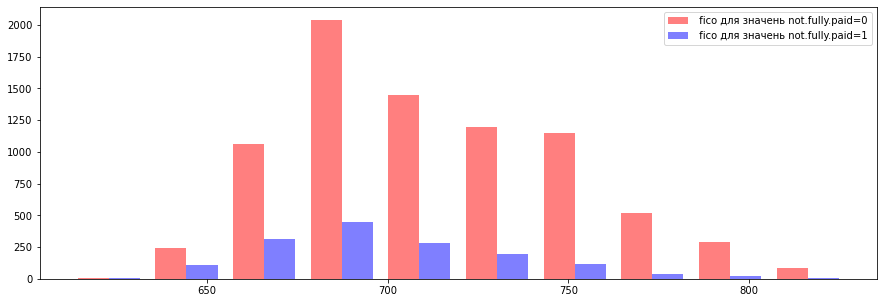

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
x = data_0['fico']
y = data_1['fico']
plt.hist([x, y], color=['r','b'], alpha=0.5)
labels= [" fico для значень not.fully.paid=0"," fico для значень not.fully.paid=1"]
plt.legend( labels)

C:\Users\VladV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


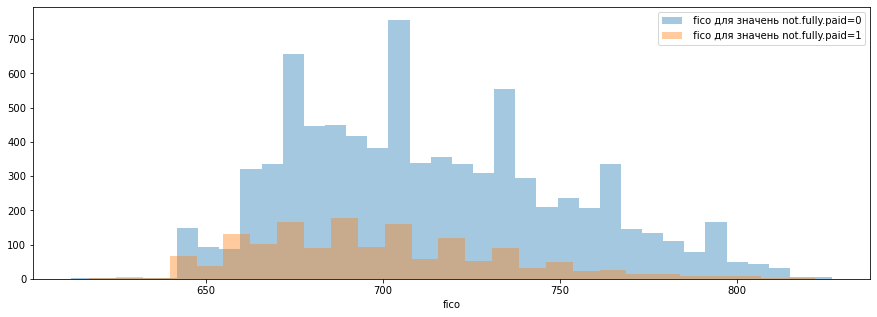

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
for a in [x, y]:
    sns.distplot(a, ax=ax, kde=False)
ax.legend(labels=[" fico для значень not.fully.paid=0"," fico для значень not.fully.paid=1"])

### Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

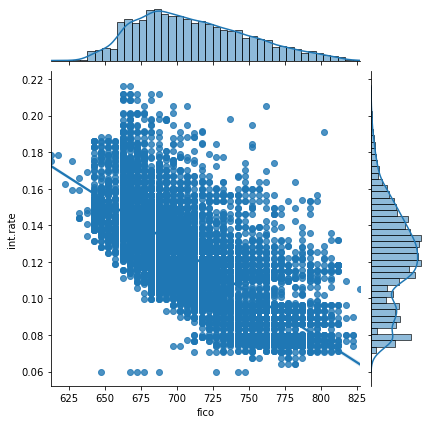

In [12]:

ax = sns.jointplot(data=data, x="fico", y="int.rate", kind="reg")

### Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

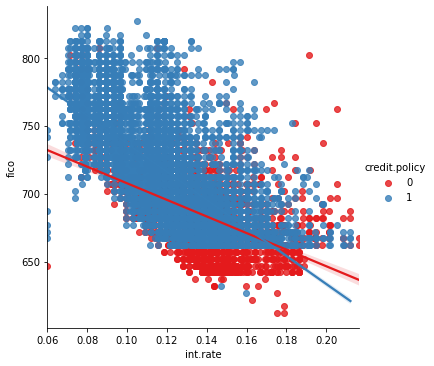

In [13]:
sns.lmplot(x = 'int.rate', y = 'fico', data = data, hue='credit.policy', palette="Set1")

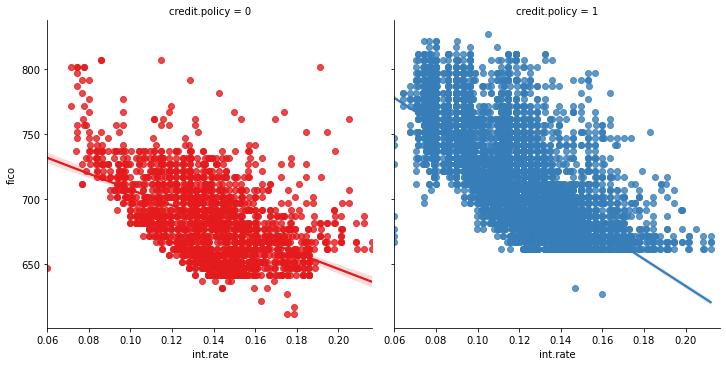

In [14]:
sns.lmplot(x = 'int.rate', y = 'fico', data = data, col = 'credit.policy', hue='credit.policy', palette="Set1")


### B purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [15]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [16]:
dum = pd.get_dummies(data['purpose'])
dum

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


In [17]:
data = pd.concat([data, dum], axis = 1)
data = data.drop('purpose', 1)
data


<ipython-input-17-062876156c45>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('purpose', 1)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


### Розбийте датасет на тестві та трейнові дані

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
list(data.columns.values)

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'all_other',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business']

In [20]:
X = data[
    ['credit.policy',
     'int.rate',
     'installment',
     'log.annual.inc',
     'dti',
     'days.with.cr.line',
     'revol.bal',
     'revol.util',
     'inq.last.6mths',
     'delinq.2yrs',
     'pub.rec',
     'not.fully.paid',
     'all_other',
     'credit_card',
     'debt_consolidation',
     'educational',
     'home_improvement',
     'major_purchase',
     'small_business']]
y = data['fico']     

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train.shape

(7662, 19)

In [23]:
y_train.shape

(7662,)

In [24]:
X_test.shape

(1916, 19)

In [25]:
y_test.shape

(1916,)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)


0.7142551428909976

In [30]:
reg.score(X_test, y_test)

0.6945418794817355

In [31]:
reg.coef_

array([ 1.01228050e+01, -8.31884656e+02,  4.20130275e-02, -4.41764895e-01,
       -1.44281791e-01,  2.12713480e-03,  2.36353818e-05, -3.23198102e-01,
       -1.17596429e-02, -9.45495482e+00, -9.35438481e+00, -3.09987692e+00,
       -9.16979043e-01, -3.96020011e+00, -4.53599190e+00, -4.51297399e+00,
        8.18350335e-01,  9.25002426e-01,  1.21827923e+01])

### Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

#### дерево рішень

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
from dtreeviz.trees import *

In [69]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [70]:
score = clf.score(X_test, y_test)
print(score)

0.1325678496868476


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         627       0.00      0.00      0.00         1
         632       0.00      0.00      0.00         1
         637       0.00      0.00      0.00         0
         642       0.20      0.16      0.18        25
         647       0.23      0.30      0.26        23
         652       0.17      0.20      0.19        25
         657       0.19      0.27      0.23        26
         662       0.22      0.18      0.20        91
         667       0.20      0.18      0.19        93
         672       0.16      0.15      0.15        82
         677       0.12      0.11      0.11       104
         682       0.17      0.17      0.17       108
         687       0.13      0.13      0.13       111
         692       0.14      0.12      0.13       110
         697       0.18      0.23      0.20        92
         702       0.11      0.12      0.11        75
         707       0.11      0.10      0.10        91
         712       0.17    

C:\Users\VladV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VladV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
cm=confusion_matrix(y_test, y_pred)

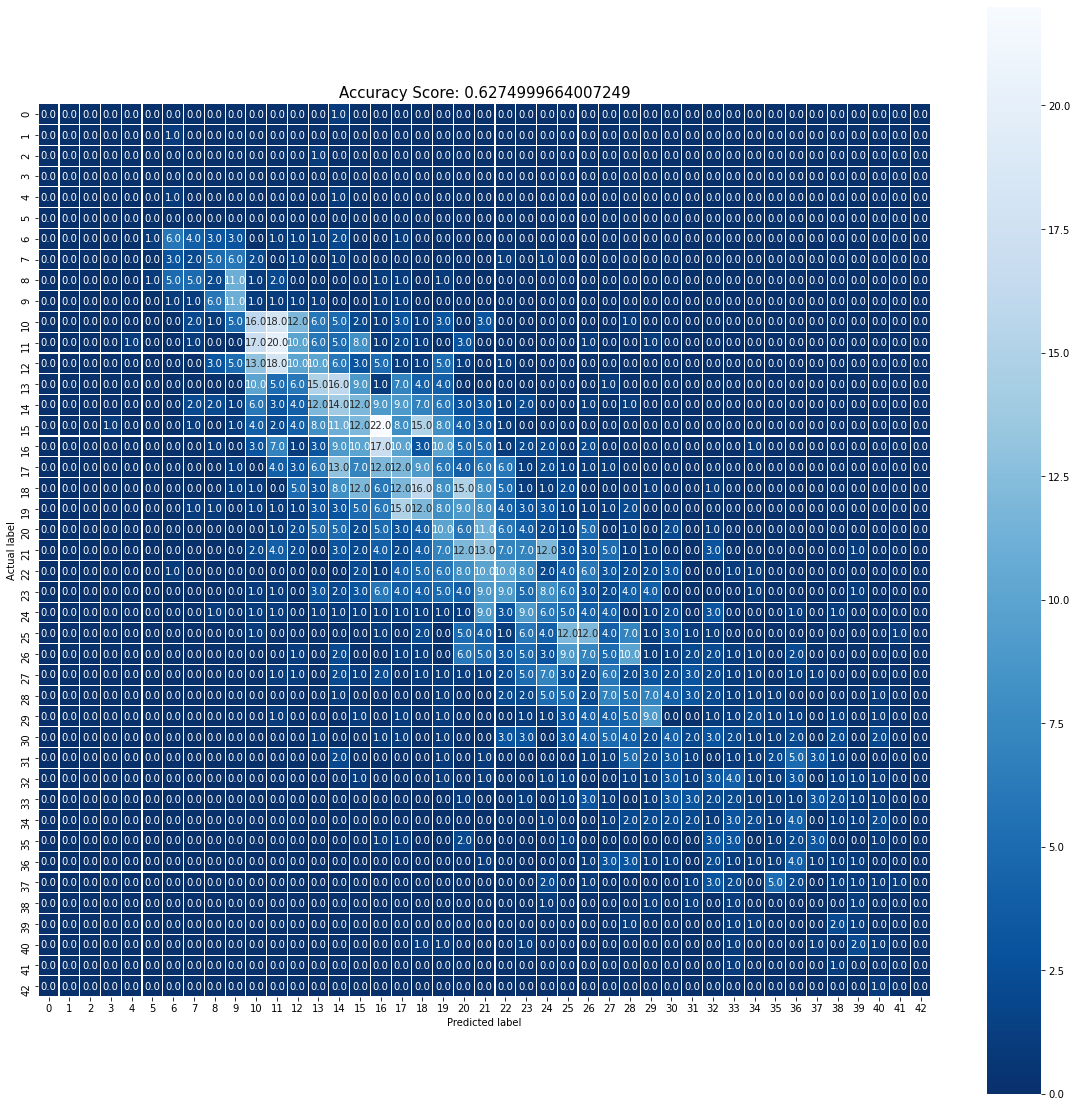

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

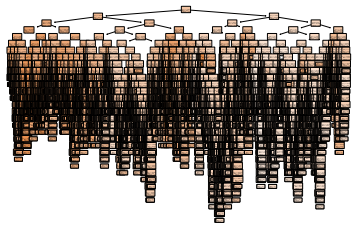

In [39]:
tree.plot_tree(clf,
               rounded=True, 
               filled = True);

#### логістична регресія

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logisticRegr = LogisticRegression()
clf1 = logisticRegr.fit(X_train,y_train)
clf1.score(X_train,y_train)

C:\Users\VladV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.05716523101018011

In [42]:
y_pred1 = logisticRegr.predict(X_test)

In [43]:
score1 = logisticRegr.score(X_test, y_test)
print(score1)

0.044363256784968684


In [44]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         612       0.00      0.00      0.00         1
         617       0.00      0.00      0.00         1
         622       0.00      0.00      0.00         1
         632       0.00      0.00      0.00         2
         642       0.00      0.00      0.00        23
         647       0.00      0.00      0.00        22
         652       0.00      0.00      0.00        30
         657       0.00      0.00      0.00        25
         662       0.00      0.00      0.00        79
         667       0.00      0.00      0.00        77
         672       0.00      0.00      0.00        82
         677       0.00      0.00      0.00        78
         682       0.04      0.45      0.07        98
         687       0.06      0.33      0.10       105
         692       0.04      0.05      0.04        92
         697       1.00      0.01      0.02        95
         702       0.00      0.00      0.00       106
         707       0.00    

C:\Users\VladV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


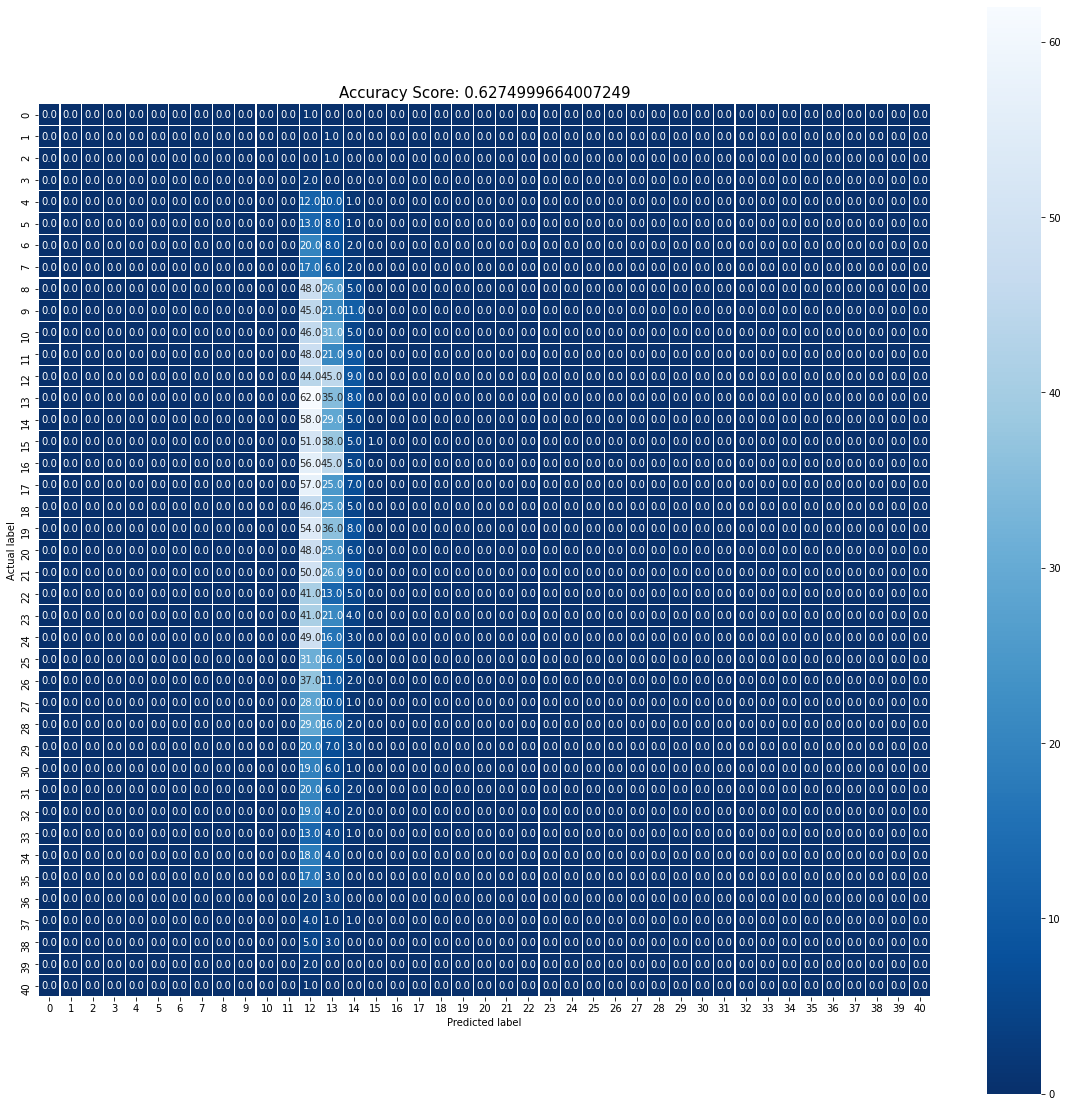

In [45]:
cm1=confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [48]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred_test = rf.predict(X_test)

In [49]:
y_pred_test

array([692, 692, 672, ..., 657, 702, 757], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred_test)

0.15605427974947808

In [51]:
score2 = rf.score(X_test, y_test)
print(score2)

0.15605427974947808


In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         627       0.00      0.00      0.00         1
         632       0.00      0.00      0.00         1
         642       0.21      0.16      0.18        25
         647       0.00      0.00      0.00        23
         652       0.24      0.36      0.29        25
         657       0.24      0.42      0.31        26
         662       0.23      0.25      0.24        91
         667       0.18      0.25      0.21        93
         672       0.20      0.12      0.15        82
         677       0.18      0.09      0.12       104
         682       0.18      0.25      0.21       108
         687       0.13      0.15      0.14       111
         692       0.16      0.14      0.15       110
         697       0.17      0.17      0.17        92
         702       0.06      0.09      0.08        75
         707       0.15      0.14      0.15        91
         712       0.09      0.06      0.07        82
         717       0.18    

C:\Users\VladV\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


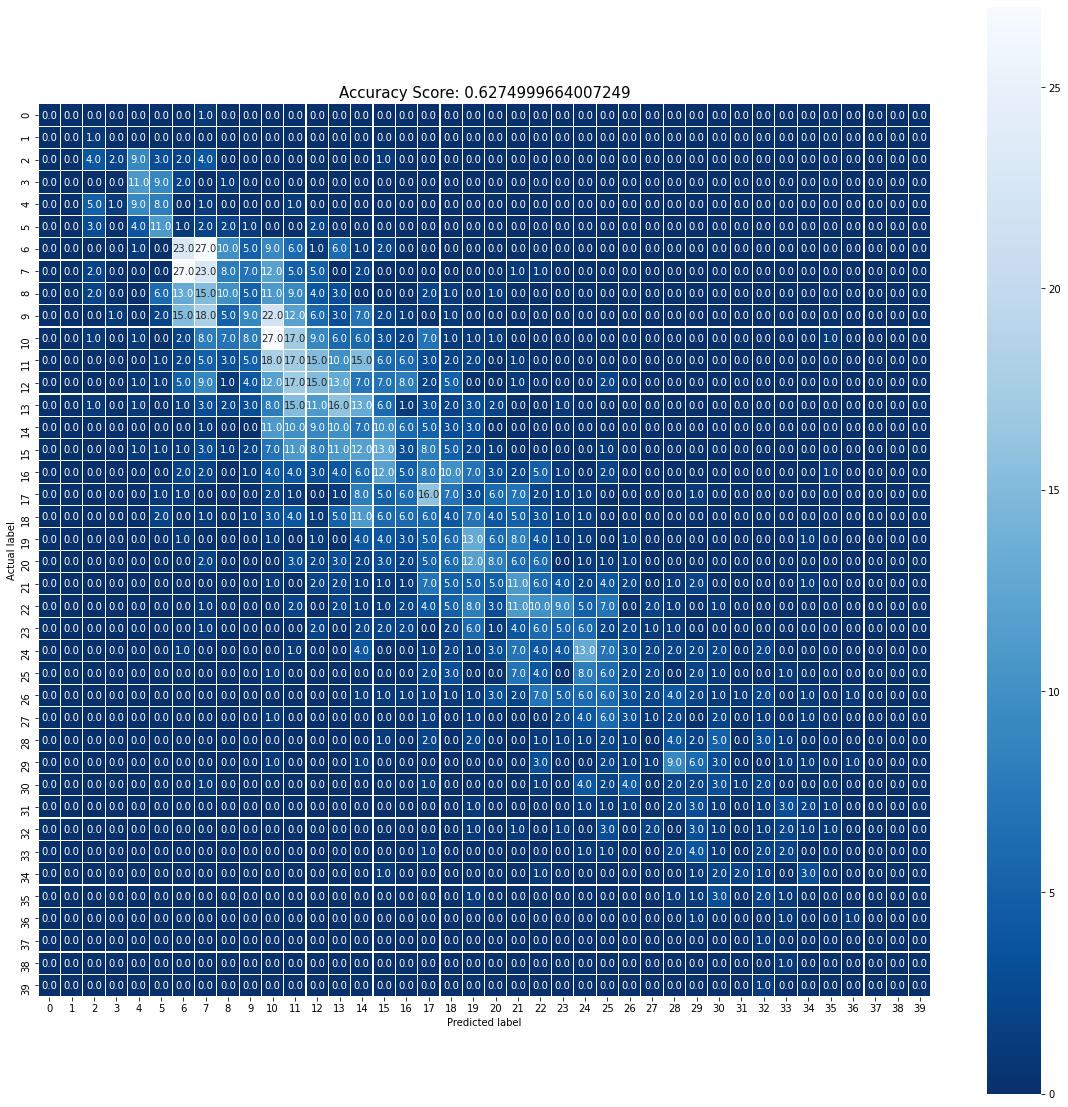

In [53]:
cm2=confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True, fmt=".1f", linewidths=.1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### XGBoost

In [74]:
from xgboost import XGBClassifier

In [75]:
XGBr = XGBClassifier()
XGBr.fit(X_train,y_train)
y_pred_XGBr = XGBr.predict(X_test)



C:\Users\VladV\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
XGBr.score(X_train,y_train)

0.9990864004176455

In [86]:
XGBr.score(X_test, y_test)

0.15970772442588727

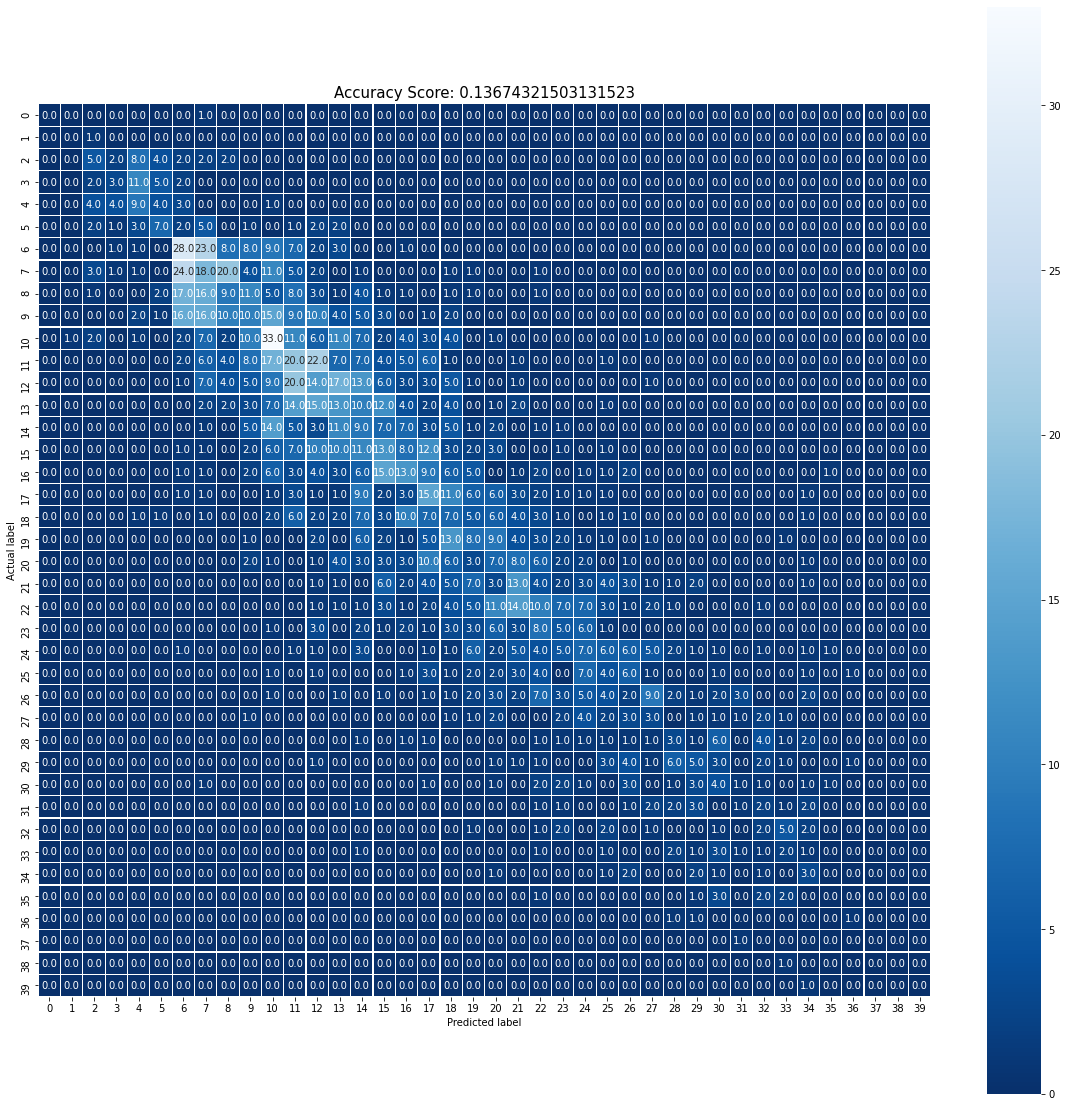

In [84]:
cm3=confusion_matrix(y_test, y_pred_XGBr)
plt.figure(figsize=(20,20))
sns.heatmap(cm3, annot=True, fmt=".1f", linewidths=.1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [87]:
from xgboost import XGBRegressor

In [88]:
XGBrr = XGBRegressor()
XGBrr.fit(X_train,y_train)
y_pred_XGBrr = XGBrr.predict(X_test)

In [89]:
XGBrr.score(X_train,y_train)

0.9552662679618125

In [90]:
XGBrr.score(X_test, y_test)

0.8279069302617414

#### Використайте ансамбель voting для всіх моделей

In [63]:
from sklearn.ensemble import VotingClassifier

In [80]:
eclf = VotingClassifier(estimators=[  ('clf', clf), ('rf', rf), ('LogRegr', clf1), ('XGBRegr', XGBr)])

In [81]:
eclf.fit(X_train, y_train)
y_pred_eclf = eclf.predict(X_test)

C:\Users\VladV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VladV\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
from sklearn.metrics import accuracy_score

In [83]:
score = accuracy_score(y_test, y_pred_eclf)
print("Voting Score % d" % score)

Voting Score  0


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [2]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [8]:
import requests
import pandas as pd

In [4]:
r = requests.get(url)

In [12]:
data = pd.read_csv(url)
data

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


#### Виведіть список унікальних міст з датасету

In [14]:
data['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [15]:
data['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

#### Виведіть дату початку та кінця ведення даних

In [19]:
data.dtypes


city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [21]:
data["date.utc"] = pd.to_datetime(data["date.utc"])

In [22]:
data.dtypes

city                      object
country                   object
date.utc     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [23]:
data["date.utc"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [24]:
data["date.utc"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

#### Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)?

In [ ]:
groupby(pd.Grouper(key='date.utc', freq='1D')).sum()

In [25]:
data['Day_of_week'] = data["date.utc"].dt.dayofweek

In [26]:
data

,city,country,date.utc,location,parameter,value,unit,Day_of_week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,1


In [34]:
data.groupby(['city', 'Day_of_week'])['value'].mean()

city       Day_of_week
Antwerpen  0              27.875000
           1              22.214286
           2              21.125000
           3              27.500000
           4              28.400000
           5              33.500000
           6              21.896552
London     0              23.969697
           1              24.885714
           2              23.460432
           3              24.780142
           4              26.446809
           5              24.977612
           6              24.859155
Paris      0              24.856250
           1              30.999359
           2              29.165753
           3              28.600690
           4              31.617986
           5              25.266154
           6              23.274306
Name: value, dtype: float64

In [35]:
data_gr

city       Day_of_week
Antwerpen  0              27.875000
           1              22.214286
           2              21.125000
           3              27.500000
           4              28.400000
           5              33.500000
           6              21.896552
London     0              23.969697
           1              24.885714
           2              23.460432
           3              24.780142
           4              26.446809
           5              24.977612
           6              24.859155
Paris      0              24.856250
           1              30.999359
           2              29.165753
           3              28.600690
           4              31.617986
           5              25.266154
           6              23.274306
Name: value, dtype: float64

#### Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [31]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Day_of_week'>

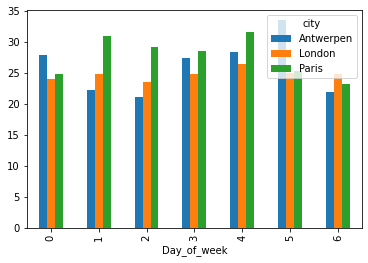

In [51]:
data.groupby(['city', 'Day_of_week'])['value'].mean().unstack(level=0).plot.bar(stacked=False)

